In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


In [106]:
data = pd.read_csv('income.data.csv', index_col=0)
data.head(20)

,income,happiness
1,3.862647,2.314489
2,4.979381,3.433490
3,4.923957,4.599373
4,3.214372,2.791114
5,7.196409,5.596398
6,3.729643,2.458556
7,4.674517,3.192992
8,4.498104,1.907137
9,3.121631,2.942450
10,4.639914,3.737942


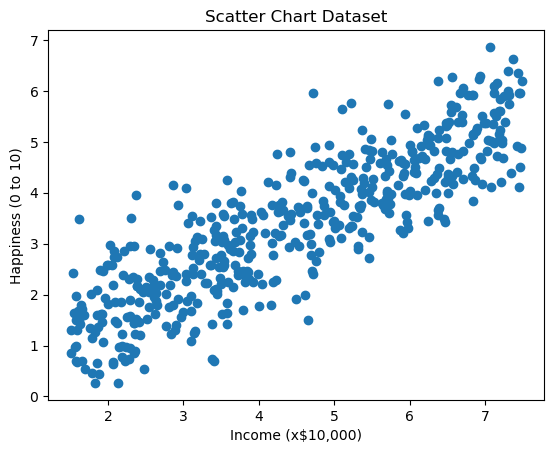

In [107]:
plt.title("Scatter Chart Dataset")
plt.scatter(data['income'],data['happiness'])
plt.xlabel('Income (x$10,000)')
plt.ylabel('Happiness (0 to 10)')
plt.show()

In [108]:
X = data[['income']].to_numpy()  
y = data[['happiness']].to_numpy()  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, random_state=42
)

In [109]:
one_matrix = np.ones((X_train.shape[0],1))
X_train = np.concatenate((one_matrix,X_train),axis=1)
X_train.shape

(398, 2)

In [110]:
A = np.dot(X_train.T,X_train)
A

array([[ 398.        , 1782.75265922],
       [1782.75265922, 9216.03554852]])

In [111]:
b = np.dot(X_train.T,y_train)
b

array([[1348.48147128],
       [6932.11707362]])

In [112]:
# w = A+*b
w = np.dot(np.linalg.pinv(A),b)
w

array([[0.14170387],
       [0.7247687 ]])

In [113]:
data['income'].max()

7.48152138059959

In [114]:
w0  = w[0][0]
w1 = w[1][0]

x0 = np.linspace(data['income'].min(),data['income'].max(),2)
x0

y0 = w0 + w1*x0
y0

array([1.23340488, 5.56407641])

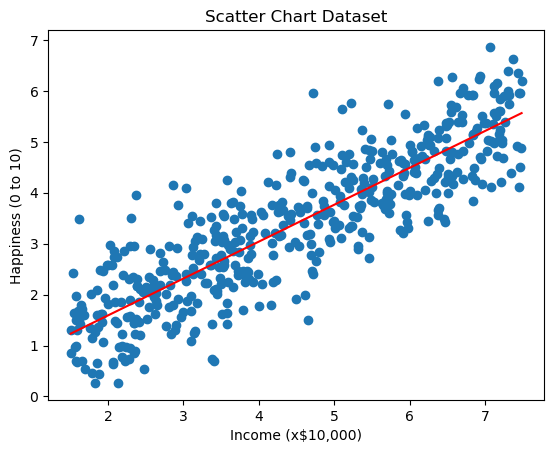

In [115]:
plt.title("Scatter Chart Dataset")
plt.plot(x0,y0,'r')
plt.scatter(data['income'],data['happiness'])
plt.xlabel('Income (x$10,000)')
plt.ylabel('Happiness (0 to 10)')
plt.show()

In [116]:
def calculate_metric(prediction, actual):
    SS_res = np.sum((prediction - actual)**2)
    SS_tot = np.sum((actual - np.mean(actual))**2)
    r2_score = 1 - SS_res/SS_tot
    return r2_score

prediction = w0 + np.dot(w1,X_test)

r2_score = calculate_metric(prediction, y_test)

r2_score

0.6662585264508234

In [118]:
from sklearn.metrics import r2_score

r2_scores = r2_score(y_test,prediction)
r2_scores



0.6662585264508234